# Exploratory Data Analysis

## Introduction

After the data cleaning step where we put our data into a few standard formats, the next step is to take a look at the data and see if what we're looking at makes sense. Before applying any fancy algorithms, it's always important to explore the data first.

When working with numerical data, some of the exploratory data analysis (EDA) techniques we can use include finding the average of the data set, the distribution of the data, the most common values, etc. The idea is the same when working with text data. We are going to find some more obvious patterns with EDA before identifying the hidden patterns with machines learning (ML) techniques. We are going to look at the following for each comedian:

1. **Most common words** - find these and create word clouds
2. **Size of vocabulary** - look number of unique words and also how quickly someone speaks
3. **Amount of profanity** - most common terms

## Most Common Words

### Analysis

In [1]:
# Read in the document-term matrix
import pandas as pd

data = pd.read_pickle('dtm.pkl')
data = data.transpose()
data.head()

,bill,brian,dave,fortune,gabriel,jim,kathleen,oswalt,vir
aaah,0,0,1,0,1,0,0,0,0
aarp,1,0,0,0,0,0,0,0,0
abc,0,0,0,0,1,0,0,0,0
abdomen,0,0,0,0,0,1,0,0,0
abducted,0,0,0,0,0,0,1,0,1


In [2]:
# Find the top 30 words said by each comedian
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))

top_dict['vir']

[('like', 76),
 ('just', 63),
 ('know', 54),
 ('shit', 44),
 ('im', 39),
 ('dont', 39),
 ('thats', 36),
 ('think', 31),
 ('right', 28),
 ('guys', 25),
 ('did', 24),
 ('youre', 24),
 ('yeah', 24),
 ('indian', 24),
 ('years', 22),
 ('world', 22),
 ('got', 21),
 ('people', 20),
 ('beautiful', 20),
 ('beef', 19),
 ('india', 18),
 ('day', 18),
 ('believe', 17),
 ('time', 17),
 ('fuck', 17),
 ('man', 17),
 ('thing', 16),
 ('good', 16),
 ('god', 16),
 ('went', 16)]

In [3]:
# Print the top 15 words said by each comedian
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[0:14]]))
    print('---')

bill
like, just, know, right, fuckin, im, dont, youre, gonna, shit, yeah, people, fuck, thats
---
brian
know, im, dont, like, uh, just, oh, yeah, man, okay, thank, youre, guy, think
---
dave
like, know, said, just, im, shit, people, didnt, dont, ahah, time, thats, fuck, fucking
---
fortune
like, im, just, got, said, dont, know, did, good, jax, right, oh, thats, uh
---
gabriel
like, im, know, said, just, dont, youre, thats, right, going, got, okay, oh, hes
---
jim
like, audience, laughs, know, im, dont, thats, just, people, horse, gonna, did, theyre, youre
---
kathleen
im, dont, know, like, gonna, thats, people, just, youre, cause, said, thought, think, really
---
oswalt
im, like, oh, thats, know, right, gonna, youre, dont, just, fuck, got, yeah, theres
---
vir
like, just, know, shit, im, dont, thats, think, right, guys, did, youre, yeah, indian
---


**NOTE:** At this point, we could go on and create word clouds. However, by looking at these top words, you can see that some of them have very little meaning and could be added to a stop words list, so let's do just that.



In [4]:
# Look at the most common top words --> add them to the stop word list
from collections import Counter

# Let's first pull out the top 30 words for each comedian
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
        
words

['like',
 'just',
 'know',
 'right',
 'fuckin',
 'im',
 'dont',
 'youre',
 'gonna',
 'shit',
 'yeah',
 'people',
 'fuck',
 'thats',
 'did',
 'got',
 'oh',
 'time',
 'going',
 'theyre',
 'little',
 'women',
 'cause',
 'great',
 'thing',
 'shes',
 'look',
 'gotta',
 'okay',
 'didnt',
 'know',
 'im',
 'dont',
 'like',
 'uh',
 'just',
 'oh',
 'yeah',
 'man',
 'okay',
 'thank',
 'youre',
 'guy',
 'think',
 'hes',
 'thats',
 'want',
 'ask',
 'right',
 'way',
 'people',
 'wow',
 'map',
 'did',
 'really',
 'need',
 'big',
 'hear',
 'kids',
 'wanna',
 'like',
 'know',
 'said',
 'just',
 'im',
 'shit',
 'people',
 'didnt',
 'dont',
 'ahah',
 'time',
 'thats',
 'fuck',
 'fucking',
 'black',
 'man',
 'got',
 'good',
 'right',
 'gonna',
 'gay',
 'lot',
 'hes',
 'did',
 'yeah',
 'oj',
 'oh',
 'come',
 'guys',
 'kevin',
 'like',
 'im',
 'just',
 'got',
 'said',
 'dont',
 'know',
 'did',
 'good',
 'jax',
 'right',
 'oh',
 'thats',
 'uh',
 'want',
 'look',
 'think',
 'cause',
 'going',
 'start',
 'gonn

In [5]:
# Let's aggregate this list and identify the most common words along with how many routines they occur in
Counter(words).most_common()

[('like', 9),
 ('just', 9),
 ('know', 9),
 ('right', 9),
 ('im', 9),
 ('dont', 9),
 ('thats', 9),
 ('yeah', 8),
 ('people', 8),
 ('oh', 8),
 ('youre', 7),
 ('gonna', 7),
 ('did', 7),
 ('got', 7),
 ('think', 6),
 ('cause', 5),
 ('good', 5),
 ('shit', 4),
 ('fuck', 4),
 ('time', 4),
 ('going', 4),
 ('theyre', 4),
 ('look', 4),
 ('okay', 4),
 ('hes', 4),
 ('said', 4),
 ('little', 3),
 ('thing', 3),
 ('didnt', 3),
 ('uh', 3),
 ('man', 3),
 ('thank', 3),
 ('want', 3),
 ('theres', 3),
 ('shes', 2),
 ('guy', 2),
 ('way', 2),
 ('really', 2),
 ('kids', 2),
 ('wanna', 2),
 ('fucking', 2),
 ('lot', 2),
 ('come', 2),
 ('guys', 2),
 ('went', 2),
 ('car', 2),
 ('goes', 2),
 ('tell', 2),
 ('say', 2),
 ('day', 2),
 ('god', 2),
 ('fuckin', 1),
 ('women', 1),
 ('great', 1),
 ('gotta', 1),
 ('ask', 1),
 ('wow', 1),
 ('map', 1),
 ('need', 1),
 ('big', 1),
 ('hear', 1),
 ('ahah', 1),
 ('black', 1),
 ('gay', 1),
 ('oj', 1),
 ('kevin', 1),
 ('jax', 1),
 ('start', 1),
 ('room', 1),
 ('picture', 1),
 ('make', 

In [6]:
# If more than half of the comedians have it as a top word, exclude it from the list
add_stop_words = [word for word, count in Counter(words).most_common() if count > 4]
add_stop_words

['like',
 'just',
 'know',
 'right',
 'im',
 'dont',
 'thats',
 'yeah',
 'people',
 'oh',
 'youre',
 'gonna',
 'did',
 'got',
 'think',
 'cause',
 'good']

In [7]:
# Let's update our document-term matrix with the new list of stop words
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer

# Read in cleaned data
data_clean = pd.read_pickle('data_clean.pkl')

# Add new stop words
stop_words1 = list(text.ENGLISH_STOP_WORDS.union(add_stop_words))
    
# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words1)
data_cv = cv.fit_transform(data_clean.transcript)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names_out())
data_stop.index = data_clean.index

# Pickle it for later use
import pickle
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")

In [8]:
# Let's make some word clouds!
# Terminal / Anaconda Prompt: conda install -c conda-forge wordcloud
from wordcloud import WordCloud

wc = WordCloud(stopwords=stop_words1, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

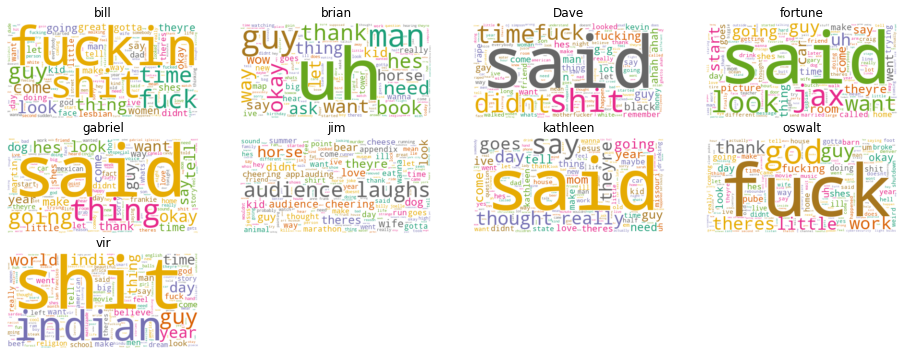

In [9]:
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['bill','brian','Dave','fortune','gabriel', 'jim','kathleen','oswalt', 'vir']

# Create subplots for each comedian
for index, comedian in enumerate(data.columns):
    wc.generate(data_clean.transcript[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

### Findings

* Bill,Owalt has used F-word number of times,so it might not be the family show .,so it might not be the family show 
* Vir has used word like 'Indian','India' so the show might regarding Indian Context or he may be an Indian Comedian.
* Jim and brian has not used any inappropiate word so it might be the family-friend Show
* Jim has not stressed too much on any word so it minght have more unique word,hence better Vocabulary


## Number of Words

### Analysis

In [10]:
# Find the number of unique words that each comedian uses

# Identify the non-zero items in the document-term matrix, meaning that the word occurs at least once
unique_list = []
for comedian in data.columns:
    uniques = data[comedian].to_numpy().nonzero()[0].size
    unique_list.append(uniques)

# Create a new dataframe that contains this unique word count
data_words = pd.DataFrame(list(zip(full_names, unique_list)), columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,brian,955
3,fortune,1337
7,oswalt,1382
2,Dave,1385
8,vir,1390
6,kathleen,1543
0,bill,1568
5,jim,1675
4,gabriel,1849


In [11]:
# Calculate the words per minute of each comedian

# Find the total number of words that a comedian uses
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
# Comedy special run times from IMDB, in minutes
run_times = [115,58,67,88,72,67,75,86,45]

# Let's add some columns to our dataframe
data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

# Sort the dataframe by words per minute to see who talks the slowest and fastest
data_wpm_sort = data_words.sort_values(by='words_per_minute')
data_wpm_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,brian,955,2121,58,36.568966
3,fortune,1337,3468,88,39.409091
7,oswalt,1382,3586,86,41.697674
0,bill,1568,5818,115,50.591304
2,Dave,1385,4065,67,60.671642
6,kathleen,1543,4713,75,62.840000
5,jim,1675,5256,67,78.447761
8,vir,1390,3639,45,80.866667
4,gabriel,1849,6766,72,93.972222


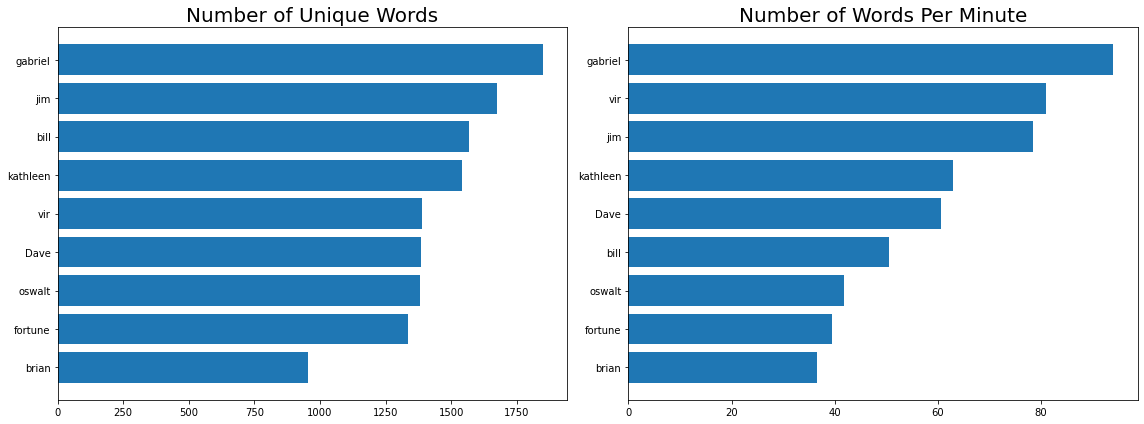

In [12]:
# Let's plot our findings
import numpy as np

y_pos = np.arange(len(data_words))

plt.subplot(1, 2, 1)
plt.barh(y_pos, data_unique_sort.unique_words, align='center')
plt.yticks(y_pos, data_unique_sort.comedian)
plt.title('Number of Unique Words', fontsize=20)

plt.subplot(1, 2, 2)
plt.barh(y_pos, data_wpm_sort.words_per_minute, align='center')
plt.yticks(y_pos, data_wpm_sort.comedian)
plt.title('Number of Words Per Minute', fontsize=20)

plt.tight_layout()
plt.show()

### Findings

* **Vocabulary**
   * gabriel and jim use a lot of words in their comedy
   * brian  and  fortune have a smaller vocabulary


* **Talking Speed**
   * Gabriel and Vir talk fast
   * Brian and fortune talk slow


## Amount of Profanity

### Analysis

In [13]:
# Earlier I said we'd revisit profanity. Let's take a look at the most common words again.
# Counter(words).most_common()

In [14]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking','fuckin', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuckin + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity['f_word/min'] = data_profanity['f_word']/run_times
data_profanity['s_word/min'] = data_profanity['s_word']/run_times
data_profanity

,f_word,s_word,f_word/min,s_word/min
bill,204,63,1.773913,0.547826
brian,0,0,0.000000,0.000000
dave,65,46,0.970149,0.686567
fortune,0,4,0.000000,0.045455
gabriel,6,18,0.083333,0.250000
jim,0,0,0.000000,0.000000
kathleen,7,5,0.093333,0.066667
oswalt,46,14,0.534884,0.162791
vir,24,44,0.533333,0.977778


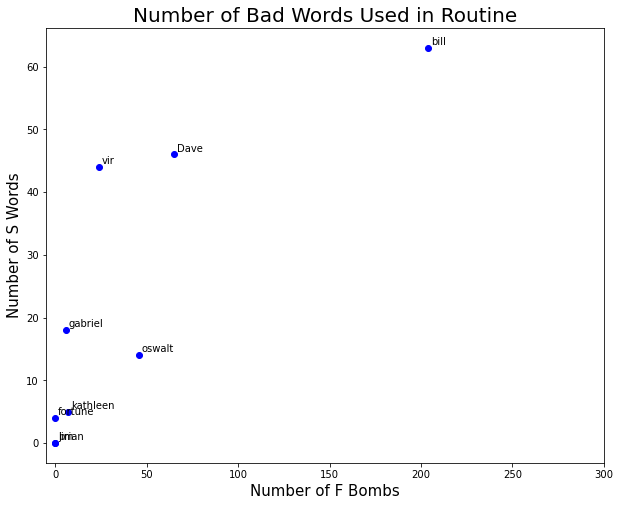

In [15]:
# Let's create a scatter plot of our findings
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 300) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

### Findings:  Bill has Used most F-Bombs 

<AxesSubplot:>

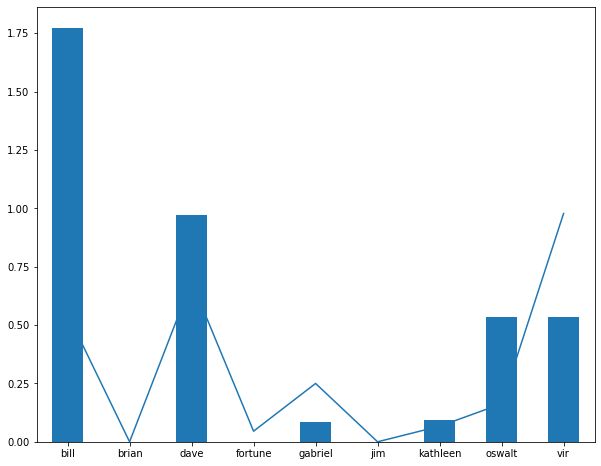

In [16]:
data_profanity['f_word/min'].plot.bar()
data_profanity['s_word/min'].plot()

* **Averaging 1-2 F-Bombs Per Minute!** - Bill,Oswalt,Vir has Very High  Freq of Using F-Bombs
* **Clean Humor** - Brianand jim has not used any F-Bombs and S-Bombs.
* **Clean Humor** - fortune has used S-Bombs but not F-Bombs
* Gabriel and Kathlen has used F-Bombs and S-Bombs but with lesser freq.

## Side Note

What was our goal for the EDA portion of our journey? **To be able to take an initial look at our data and see if the results of some basic analysis made sense.**

My conclusion - yes, it does, for a first pass. There are definitely some things that could be better cleaned up, such as adding more stop words or including bi-grams. But we can save that for another day. The results, especially the profanity findings, are interesting and make general sense, so we're going to move on.

As a reminder, the data science process is an interative one. It's better to see some non-perfect but acceptable results to help you quickly decide whether your project is a dud or not, instead of having analysis paralysis and never delivering anything.

**Alice's data science (and life) motto: Let go of perfectionism!**

## Additional Exercises

1. What other word counts do you think would be interesting to compare instead of the f-word and s-word? Create a scatter plot comparing them.

In [17]:
# from collections import Counter
# Counter(words).most_common()

### Get the Count of Abusive Words and Compliment Word for each Comedian 

#### Abusive : 'ass','bastard','shit','fuck'
#### Complimetary : 'thank','apppreciate','lovely'

In [18]:

data_other_words = data.transpose()[['ass','shit','bastard','fuck','thank','appreciate','lovely']]
data_profanity = pd.concat([data_other_words.ass+data_other_words.shit+data_other_words.bastard+data_other_words.fuck,
                            data_other_words.lovely+data_other_words.appreciate+data_other_words.thank]
                            ,axis=1)
data_profanity.columns = ['Abusive','Compliments']
data_profanity 

,Abusive,Compliments
bill,112,11
brian,0,14
dave,80,9
fortune,6,9
gabriel,26,38
jim,1,15
kathleen,19,14
oswalt,42,20
vir,64,3


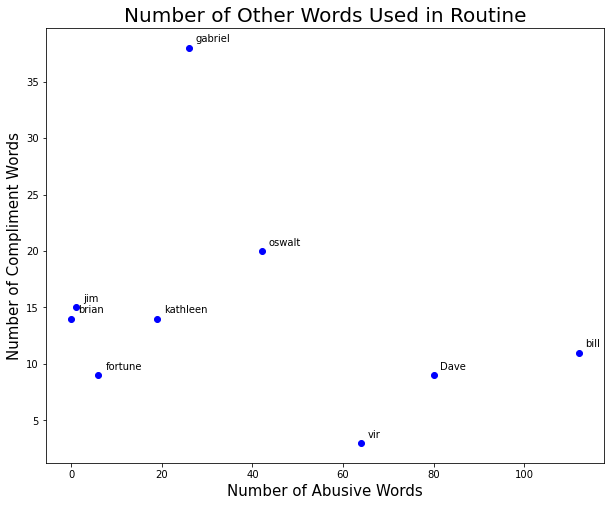

In [19]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.Abusive.loc[comedian]
    y = data_profanity.Compliments.loc[comedian]
    plt.scatter(x, y, color='Blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)

    
plt.title('Number of Other Words Used in Routine', fontsize=20)
plt.xlabel('Number of Abusive Words', fontsize=15)
plt.ylabel('Number of Compliment Words', fontsize=15)

plt.show()


### Get  Recommended

In [20]:
def get_score(act):
    x1 = data_profanity.Abusive.loc[act]
    y1 = data_profanity.Compliments.loc[act]
    return x1/y1

recommend = "fortune" if get_score('fortune')< get_score('bill') else "Bill"

In [21]:
recommend

'fortune'